In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
import pandas as pd

file_path = '/content/HSBC_ST138D-XLS-ENG.xlsx'  # Update the file path if necessary
data_df = pd.read_excel(file_path)

data_df.shape

(50000, 14)

In [ ]:
data_df['AGE'] = data_df['AGE'].astype('category').cat.codes

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         50000 non-null  int8   
 1   INCOME      50000 non-null  float64
 2   TRB         50000 non-null  float64
 3   DIG_ACTIVE  50000 non-null  int64  
 4   FX_TRANS    50000 non-null  int64  
 5   PAYME       50000 non-null  int64  
 6   CC          50000 non-null  int64  
 7   LN          50000 non-null  int64  
 8   MT          50000 non-null  int64  
 9   TD          50000 non-null  int64  
 10  SC          50000 non-null  int64  
 11  SP          50000 non-null  int64  
 12  BD          50000 non-null  int64  
 13  MPF         50000 non-null  int64  
dtypes: float64(2), int64(11), int8(1)
memory usage: 5.0 MB


In [ ]:
data_df.describe()

,AGE,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,1.087340,3.123016e+04,1.627904e+05,0.818160,0.237360,0.66570,0.48838,0.076440,0.077520,0.093200,0.096360,0.049880,0.071360,0.28964
std,0.816287,2.589240e+04,3.917090e+05,0.385716,0.425469,0.47175,0.49987,0.265703,0.267417,0.290715,0.295087,0.217699,0.257428,0.45360
min,0.000000,-1.966988e+04,0.000000e+00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.855612e+04,4.681008e+03,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,2.710790e+04,3.790828e+04,1.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.000000,3.986781e+04,1.703579e+05,1.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,2.000000,1.380715e+06,2.282008e+07,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
# Checking for any duplicates
data_df.duplicated().sum()

np.int64(1195)

In [ ]:
# Remove duplicate rows
final_data = data_df.drop_duplicates()

# Reset index
df_cleaned = final_data.reset_index(drop=True)

In [ ]:
# confirming the duplicates
df_cleaned.duplicated().sum()

np.int64(0)

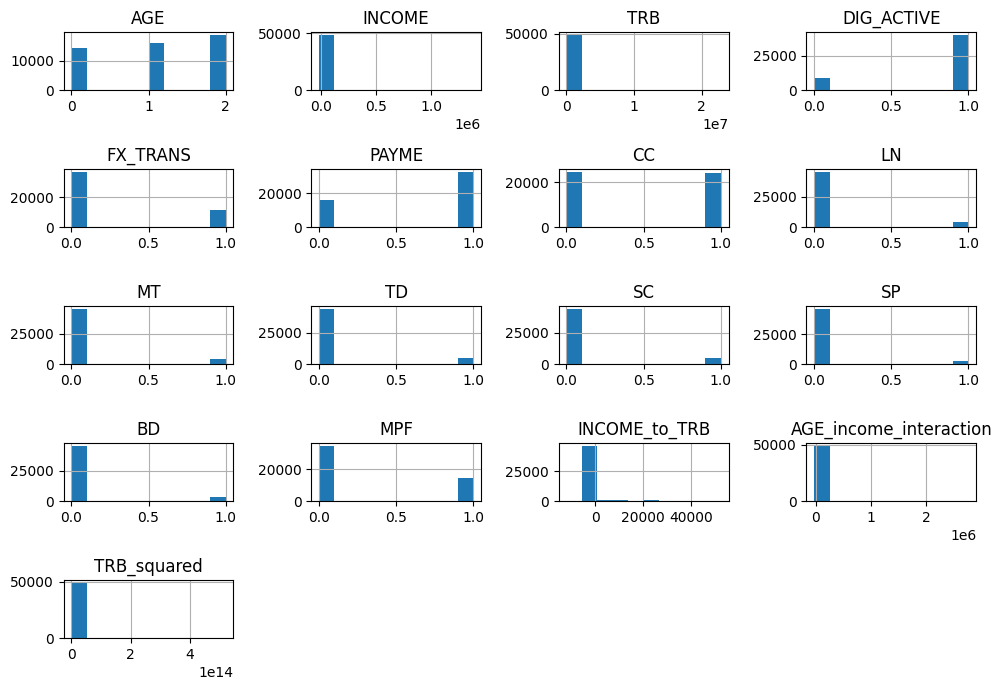

In [ ]:
# Distributions
df_cleaned.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()

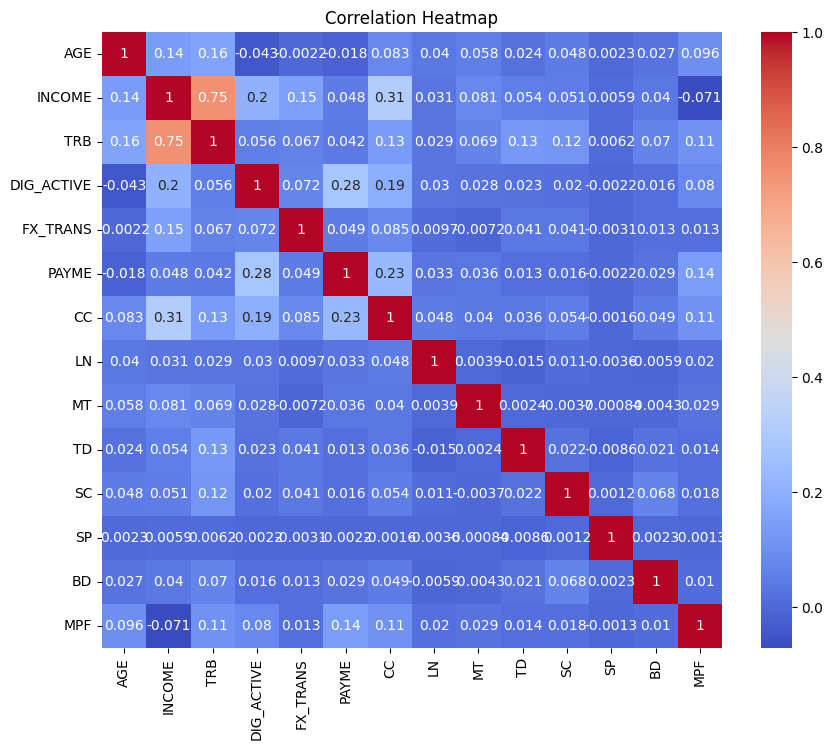

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#***Creating Clusters using K-Means:***
starts with 2 clusters


In [52]:
features = df_cleaned[['AGE', 'INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS',
               'PAYME', 'CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']]
print(df_cleaned.shape)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_df[['INCOME', 'TRB']])

# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)

(48805, 18)


In [53]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)
labels = kmeans.fit_predict(scaled_df)

In [54]:
# Get the labels
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

# Within Cluster Sum of Squares (WCSS)
- It is a measure of cluster compactness. It represents the sum of the squared differences between each data point and the centroid of its assigned cluster

In [ ]:
k_means.inertia_

65982.32795035736

# The **k_means.inertia_** command

- It is a command in the sklearn library that is of the same concept as WCSS.
- A lower inertia value indicates better clustering (i.e., tighter, more compact clusters).
- It is used in the elbow method to determine the optimal number of clusters.
- Instead of looking at inertia in isolation, it's better to use the Elbow Method to check if adding more clusters significantly reduces inertia.

In [ ]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WCSS

inertia_values = []
for i in range(1, 6):
    k_means = KMeans(n_clusters=i, random_state=1)
    k_means.fit(scaled_df)
    inertia_values.append(k_means.inertia_)

print(inertia_values)

[99999.9999999998, 65979.9773967677, 42136.727264313726, 32599.015251398047, 24077.640480108003]


In [ ]:
#Calculating WSS for other values of K - Elbow Method

wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

[99999.9999999998,
 65979.9773967677,
 42136.727264313726,
 32599.015251398047,
 24077.640480108003,
 20171.32086725266,
 17632.430306653125,
 14780.914437455041,
 12453.333885019605,
 10866.500787258054]

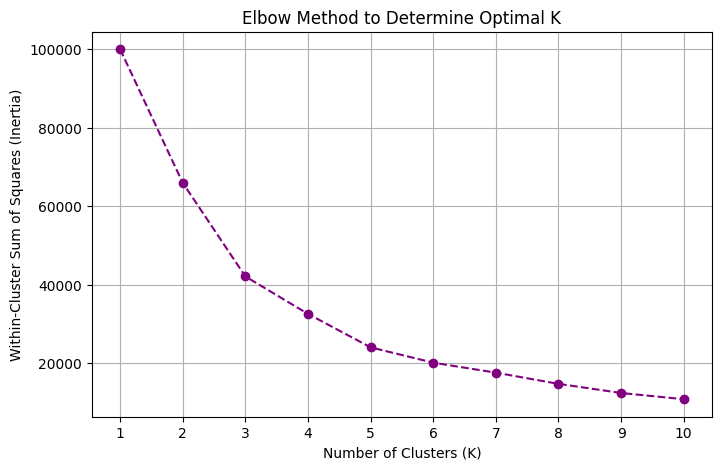

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method to Determine Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Try Different K (Bottom-Up vs Top-Down)

K = 3 (broader grouping – top-down)

K = 5 or more (finer segmentation – bottom-up)


## Determining Optimal K:
- K that is at the elbow point (where the drop in inertia slows down sharply).
- If there are 2 points that seem in a similar position (like K=3 and K=4), then test the silhouette score to see which is higher.


In [ ]:
# K-Means with K=3:

k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_
print(silhouette_score(scaled_df,labels))

0.6644679665563378


In [ ]:
# K-Means with K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

0.5769370370313787


In [ ]:
# K-Means with K=6:

k_means=KMeans(n_clusters=6,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_
print(silhouette_score(scaled_df,labels))

0.4470111964958287


In [ ]:
#k=n
# K-Means with K=48805
k_means = KMeans(n_clusters = 48805,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

In [ ]:
#k>n
# K-Means with K=50000
k_means = KMeans(n_clusters = 50000,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

In [51]:
df_cleaned["Which_Cluster"] = labels
df_cleaned.Which_Cluster.value_counts().sort_index()
clust_profile=df_cleaned.drop(['SP'],axis=1)
#clust_profile=clust_profile.groupby('Which_Cluster').mean()
#clust_profile['freq']=df_cleaned.Which_Cluster.value_counts().sort_index()
#clust_profile


# Step 2: Only keep numeric columns (for mean calculation)
df_numeric = df_cleaned.select_dtypes(include='number')  # This keeps only int and float columns

# Step 3: Add the cluster column back (for grouping)
df_numeric['Which_Cluster'] = df_cleaned['Which_Cluster']

# Step 4: Group by cluster and calculate mean
clust_profile = df_numeric.groupby('Which_Cluster').mean()

# Step 5: Add frequency column (how many customers in each cluster)
clust_profile['freq'] = df_cleaned['Which_Cluster'].value_counts().sort_index()

print(clust_profile)


                    AGE         INCOME           TRB  DIG_ACTIVE  FX_TRANS  \
Which_Cluster                                                                
0              1.486486   69972.557434  8.363630e+05    0.903504  0.371772   
1              1.045594   26729.269291  8.411643e+04    0.814153  0.227717   
2              1.562500  557241.374234  8.732494e+06    0.687500  0.156250   

                  PAYME        CC        LN        MT        TD        SC  \
Which_Cluster                                                               
0              0.724124  0.745345  0.096496  0.151752  0.191391  0.195195   
1              0.662319  0.467061  0.075403  0.070469  0.083718  0.087053   
2              0.343750  0.343750  0.062500  0.093750  0.281250  0.187500   

                     SP        BD       MPF  INCOME_to_TRB  \
Which_Cluster                                                
0              0.054254  0.123924  0.383584     453.644719   
1              0.050094  0.066517  0.

It seems that there are two possible K in the scenario but by calculating the silhouette score. We decides that k should be equals to 3 becuase it has higher silhouette socre.

Since k=3 we divide it into 3 segmentation, based on the above output the segments are

Cluster 0: includes numerous individuals who earn approximately 70 thousand dollars per year with high digital connectivity scores and regular payment applications which indicates an average level of product acceptance.

Cluster 1: contains a mid-sized population with low income who demonstrate digital activity yet use financial products at the lowest level.

Cluster 2: comprises an exclusive compact class that has both high Total Revenue Base (TRB) and extraordinarily high income but demonstrates lower digital engagement (0.68) while showing robust engagement with sophisticated banking services.


In [ ]:
# 3 Engineered Features
features = ['AGE', 'INCOME', 'TRB', 'INCOME_to_TRB', 'AGE_income_interaction', 'TRB_squared']
df_cleaned['INCOME_to_TRB'] = data_df['INCOME'] / (data_df['TRB'] + 1)
df_cleaned['AGE_income_interaction'] = data_df['AGE'] * data_df['INCOME']
df_cleaned['TRB_squared'] = data_df['TRB'] ** 2

Evaluation and Visualisation of K-Means Clustering


In [ ]:
# Initialize silhouette_scores dictionary
silhouette_scores = {}

In [ ]:
# Instead of using scaled_df, we'll use data_df[['AGE_numeric', 'INCOME', 'TRB']]
# and handle NaN values within the loop
features_for_clustering = ['AGE', 'INCOME', 'TRB']


In [ ]:
for k in [2, 3, 4]:
    # Handle NaN values before fitting KMeans
    data_for_clustering = df_cleaned[features_for_clustering].dropna()

    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(data_for_clustering)
    labels = k_means.labels_

    silhouette_scores[k] = silhouette_score(data_for_clustering, labels)

In [ ]:
# Best K
best_k = max(silhouette_scores, key=silhouette_scores.get)

In [ ]:
# Create a temporary DataFrame to store cluster labels and merge it with data_df
cluster_labels_df = data_for_clustering.copy()
cluster_labels_df['Best_Cluster'] = k_means.labels_

data_df = df_cleaned.merge(cluster_labels_df[['Best_Cluster']], left_index=True, right_index=True, how='left')

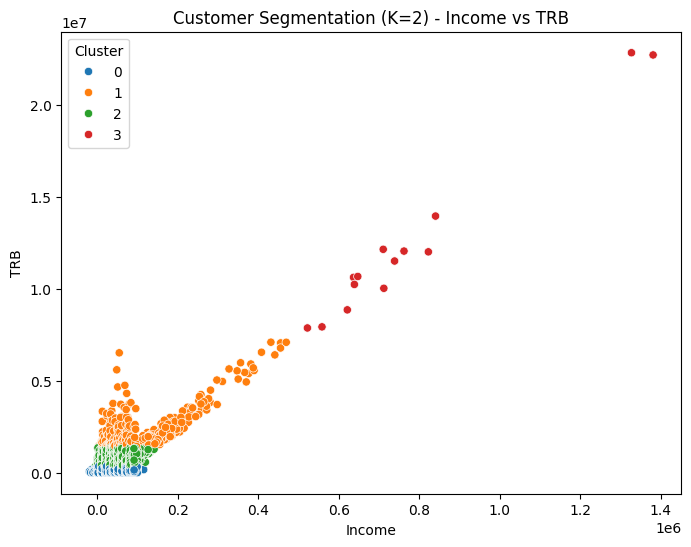

In [ ]:
# Scatter Plot (Income vs TRB)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_df['INCOME'], y=data_df['TRB'], hue=data_df['Best_Cluster'], palette='tab10')
plt.title(f"Customer Segmentation (K={best_k}) - Income vs TRB")
plt.xlabel("Income")
plt.ylabel("TRB")
plt.legend(title="Cluster")
plt.show()

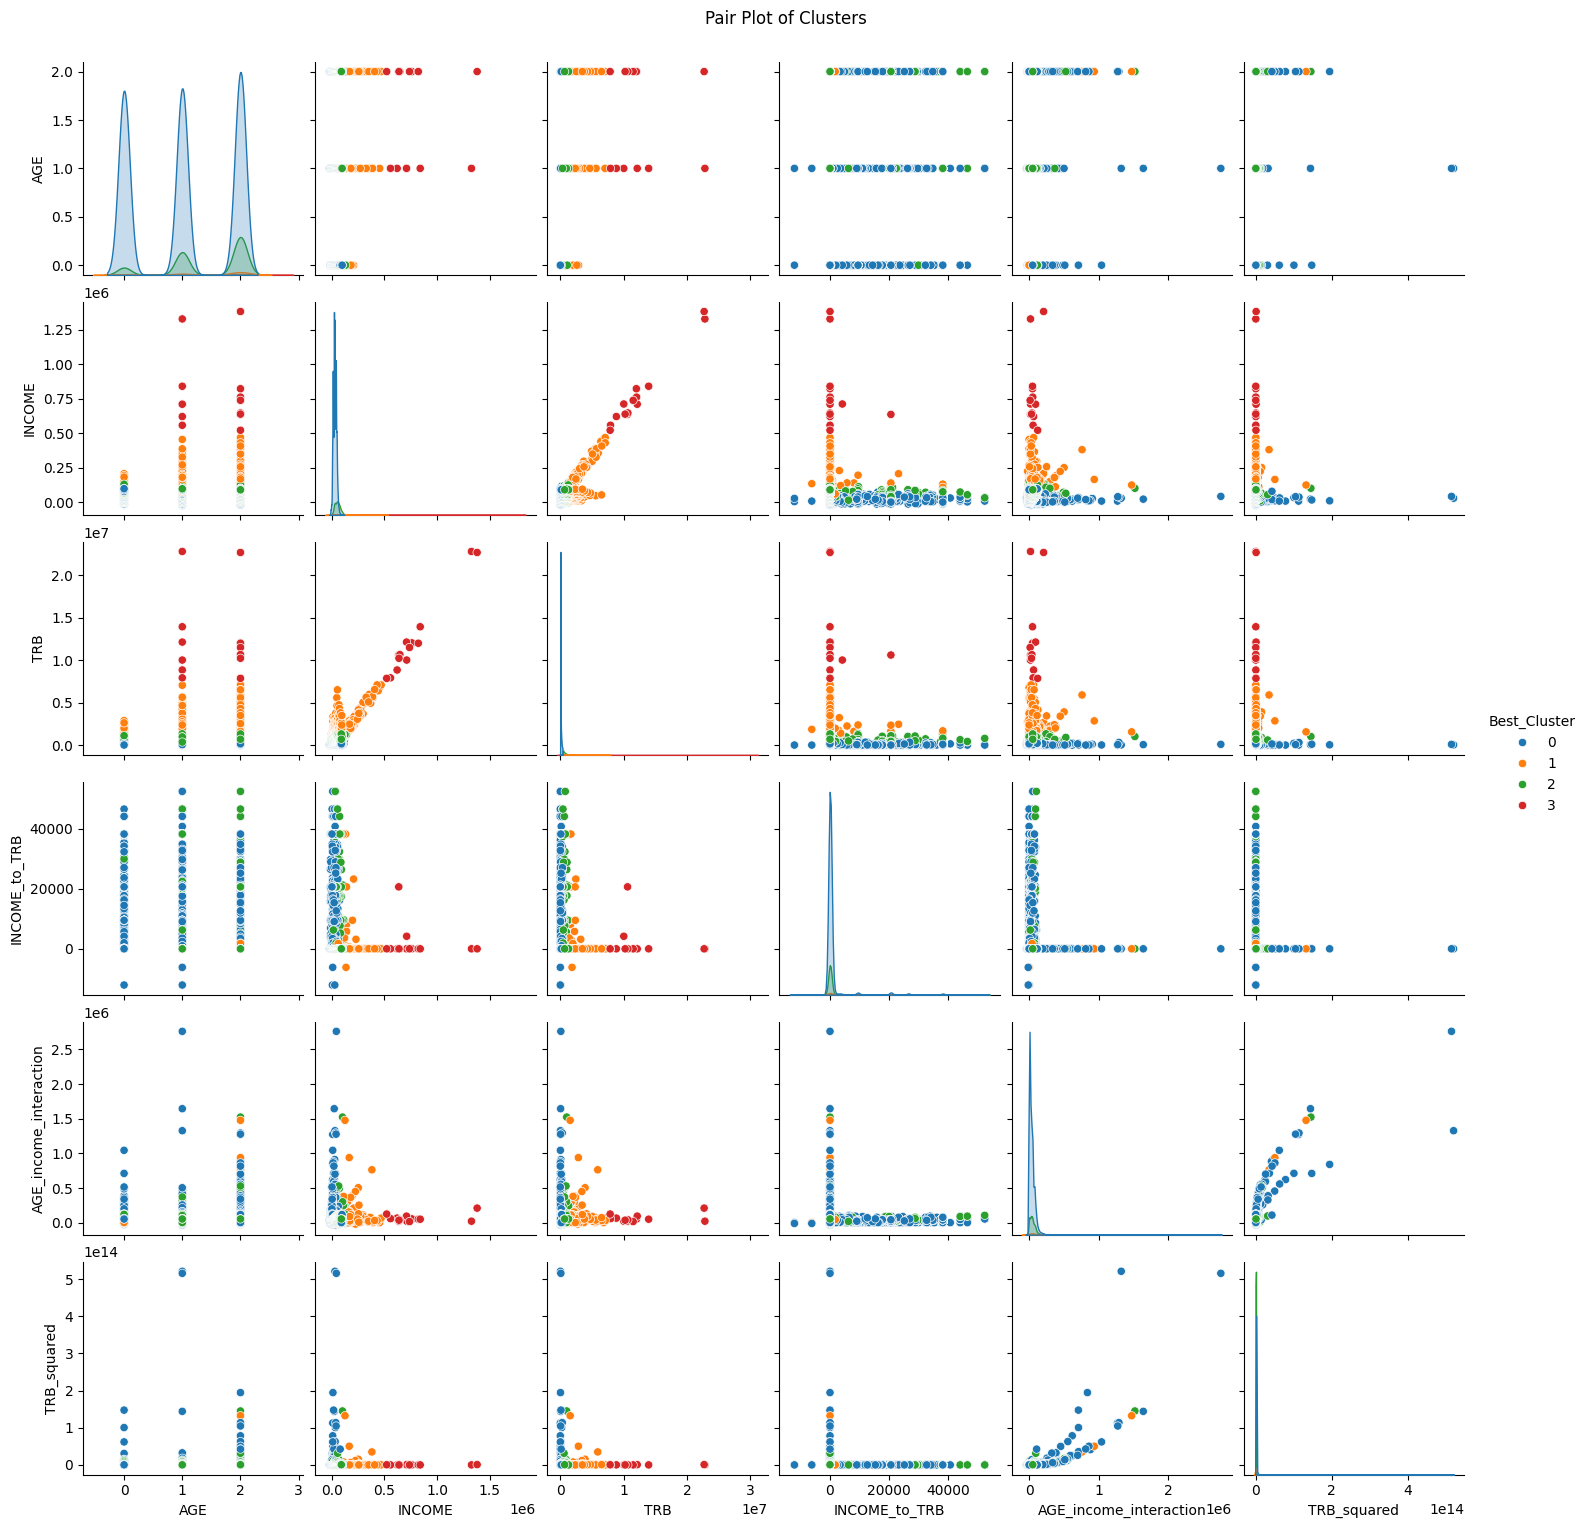

In [ ]:
# Pair Plot (using only the rows with cluster assignments)
data_with_clusters = data_df[data_df['Best_Cluster'].notna()]
# Change 'Cluster' to 'Best_Cluster' in the pairplot call
sns.pairplot(data_with_clusters[features + ['Best_Cluster']], hue='Best_Cluster', palette='tab10')
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()

In [ ]:
# Output silhouette scores
print("Silhouette Scores:")
for k, score in silhouette_scores.items():
    print(f"K = {k}: Score = {score:.4f}")

Silhouette Scores:
K = 2: Score = 0.8279
K = 3: Score = 0.8083
K = 4: Score = 0.7728


In [ ]:
features = ['AGE', 'INCOME', 'TRB', 'INCOME_to_TRB', 'AGE_income_interaction', 'TRB_squared']
X_eng = data_df[features]

# Impute NaN values using the mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_eng = imputer.fit_transform(X_eng)

# Scale engineered features
X_scaled_eng = scaler.fit_transform(X_eng)

# KMeans and Silhouette Score
kmeans_eng = KMeans(n_clusters=3, random_state=42)
labels_eng = kmeans_eng.fit_predict(X_scaled_eng)
score_eng = silhouette_score(X_scaled_eng, labels_eng)
print(f"Silhouette Score (with engineered features): {score_eng:.4f}")

Silhouette Score (with engineered features): 0.3340
